In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_classification
from sklearn.svm import SVC

import warnings
warnings.filterwarnings ('ignore')
import plotly.graph_objs as go


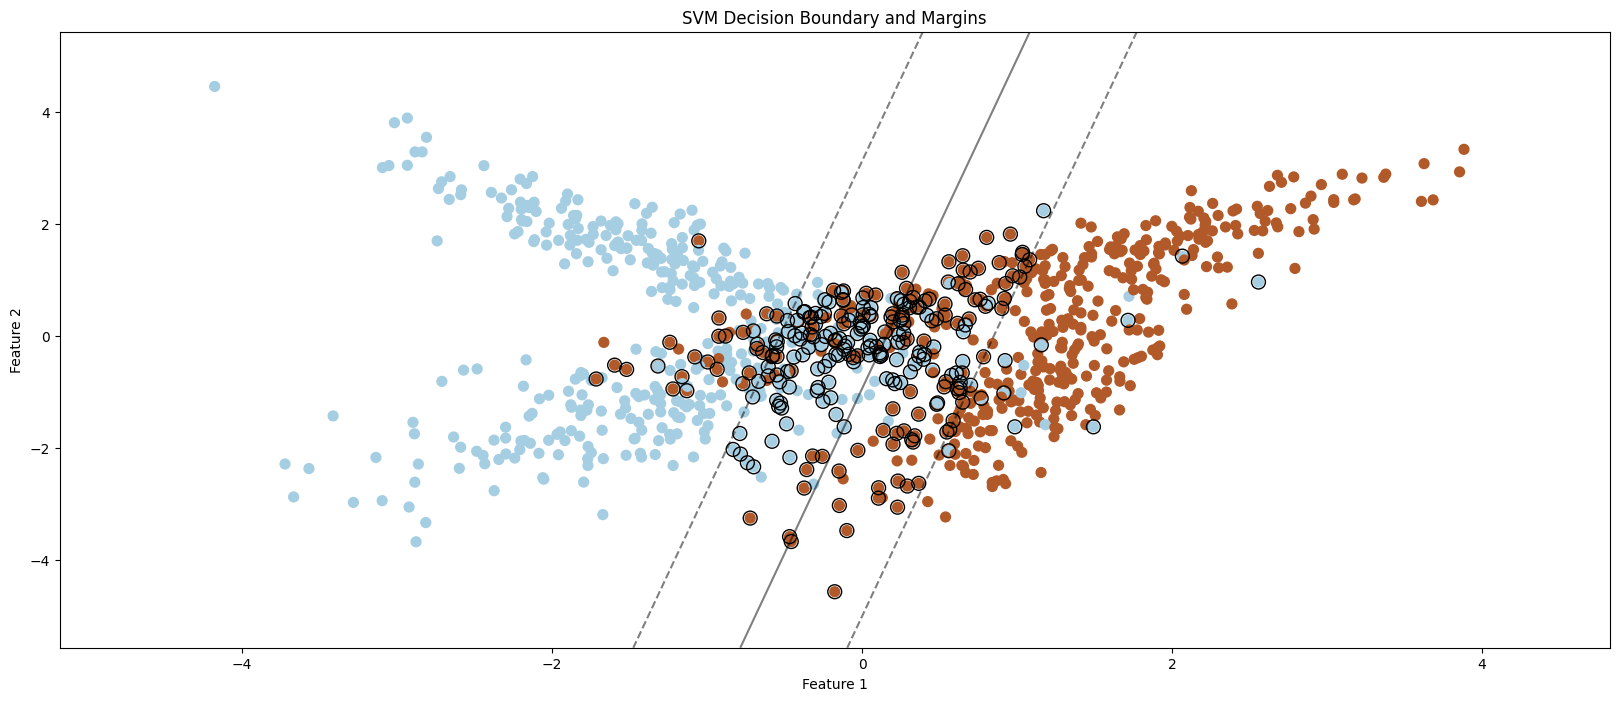

In [4]:
# Generate a sample classification dataset with 100 samples and 2 features
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=10)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
# Create a linear SVM classifier
clf = SVC(kernel='linear', C=5)
clf.fit(X_train,y_train)

# Define the plot range
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the meshgrid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize= (20,8))
# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
# Plot the decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Plot the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary and Margins')

plt.show()


In [3]:
clf.score(X_test,y_test)

0.9

In [5]:
data= pd.read_csv('E:\IT Learning\My Projects\Data Science And ML Projects\Twitter Sentiment Prediction\Twitter_sentiment_data.csv')

In [6]:
data

,Text,Language,Label
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious
3,Rwanda is set to host the headquarters of Unit...,en,positive
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious
...,...,...,...
937849,@Juice_Lemons in the dark. it’s so good,en,positive
937850,8.SSR &amp; Disha Salian case should be solved...,en,negative
937851,*ACCIDENT: Damage Only* - Raleigh Fire Depart...,en,negative
937852,@reblavoie So happy for her! She’s been incred...,en,positive


In [7]:
X= data.drop('Label', axis=1)
y= data['Label']

In [13]:
y.uni

array(['litigious', 'negative', 'positive', 'uncertainty'], dtype=object)